In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

link = "https://raw.githubusercontent.com/csbfx/cs133/main/anime_ratings.csv"

data = pd.read_csv(link,
                      na_values='Not available',
                      dtype={"episodes": 'Int64'}
                     )
data = data.dropna()

In [ ]:
data.head()

,Unnamed: 0,uid,title,synopsis,genre,aired,episodes,popularity,ranked,score
0,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25,141,25.0,8.82
1,1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22,28,24.0,8.83
2,2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13,98,23.0,8.83
3,3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64,4,1.0,9.23
4,4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1,502,22.0,8.83


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15186 entries, 0 to 19310
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15186 non-null  int64  
 1   uid         15186 non-null  int64  
 2   title       15186 non-null  object 
 3   synopsis    15186 non-null  object 
 4   genre       15186 non-null  object 
 5   aired       15186 non-null  object 
 6   episodes    15186 non-null  Int64  
 7   popularity  15186 non-null  int64  
 8   ranked      15186 non-null  float64
 9   score       15186 non-null  float64
dtypes: Int64(1), float64(2), int64(3), object(4)
memory usage: 1.3+ MB


In [ ]:
data= data.dropna()


Text(0.5, 1.0, 'number of episodes vs popularity')

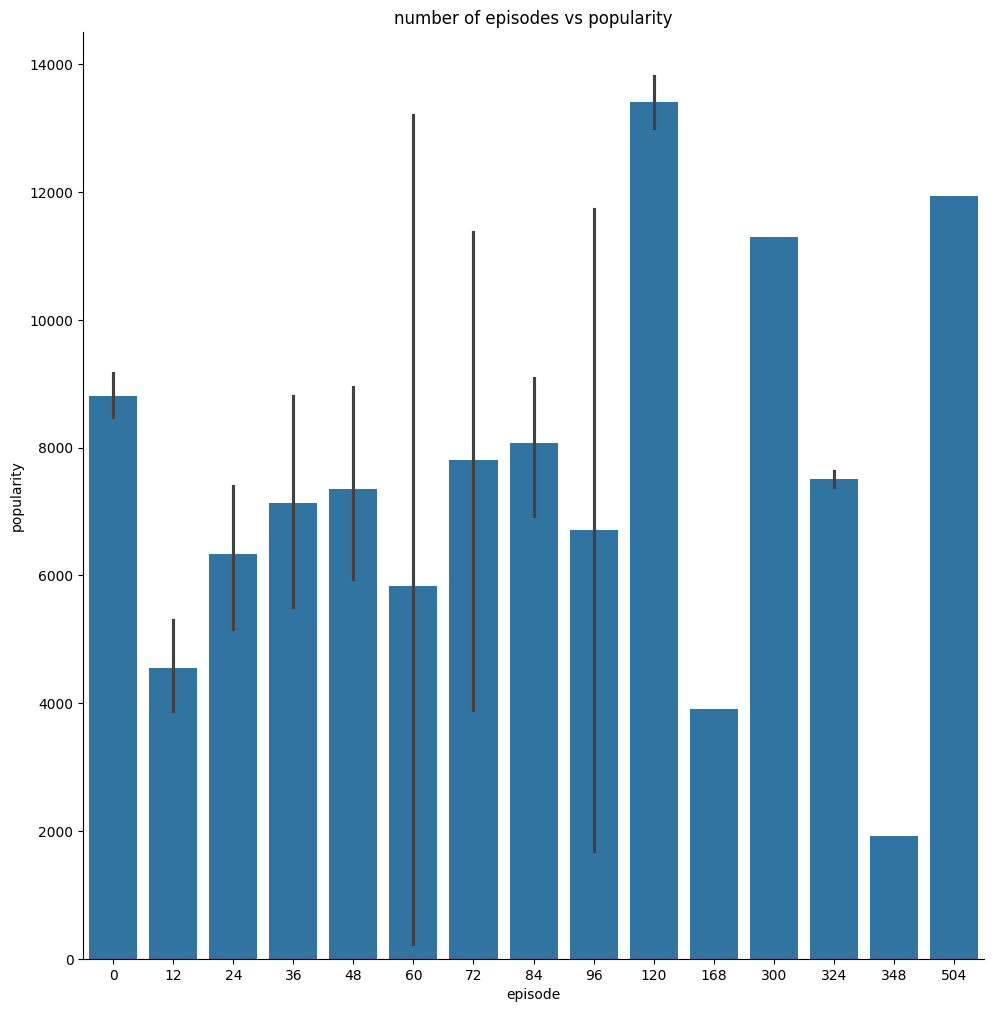

In [ ]:
#Q1 number of episodes vs popularity
#q1 number of episodes vs popularity

#specidy 0
data['episode'] = (data['episodes'] // 12) * 12
sns.catplot(
    data=data.sample(1000),
    x="episode",
    y="popularity",
    aspect=1,
    kind="bar",
    height=10,
    dodge=False
)
grouped=data.groupby(data.episodes)
data.groupby("episodes", group_keys=False).apply(lambda x: 10)


plt.title("number of episodes vs popularity")

<ipython-input-6-317f1b53d71c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['genre'] = filtered_data['genre'].str.strip("[]").str.replace("'", "").str.split(",").str[0]
<ipython-input-6-317f1b53d71c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.6% of the points cannot be pl

Text(0.5, 1.0, 'genre vs popularity')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


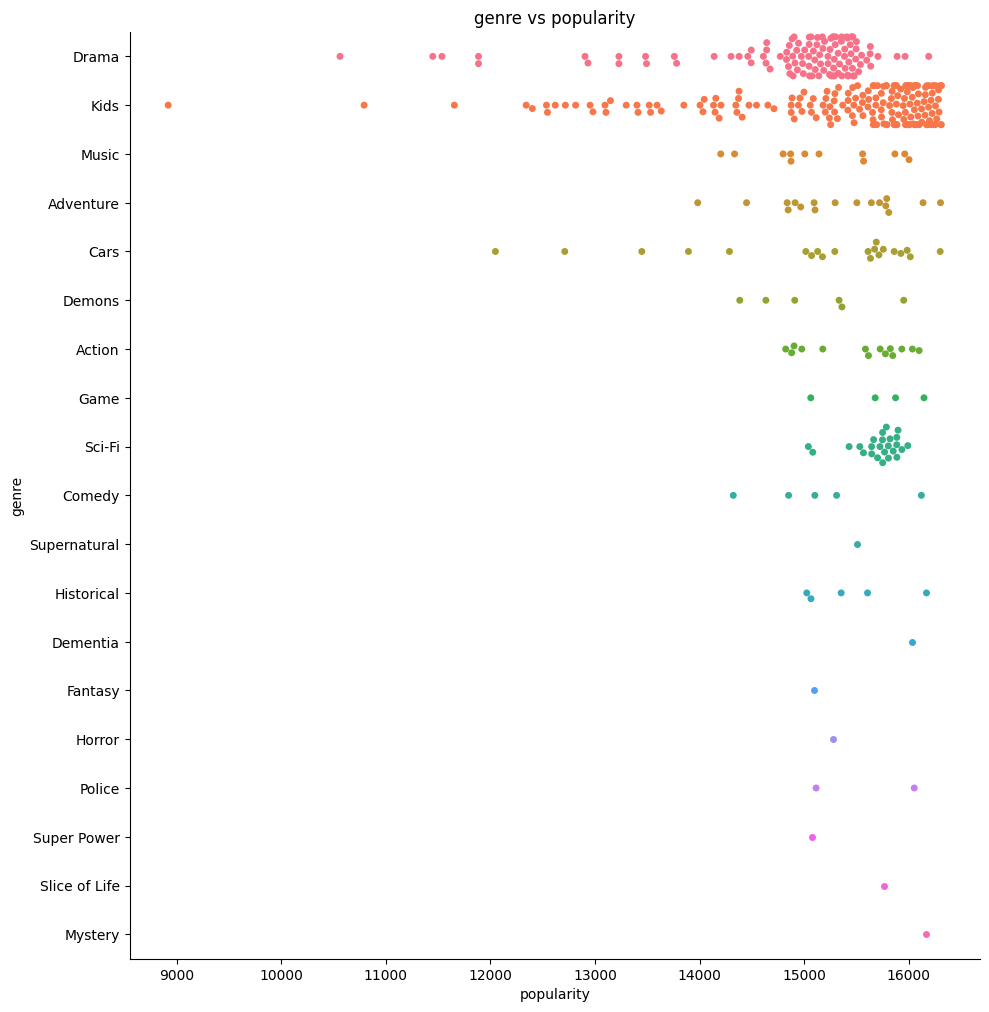

In [ ]:
#Q2 genre vs popularity OR genre by years
import matplotlib.pyplot as plt

genre_popularity = data.groupby('genre')['popularity'].mean().reset_index()


top_n = 100
most_popular_genres = genre_popularity.nlargest(top_n, 'popularity')['genre']



filtered_data = data[data['genre'].isin(most_popular_genres)]
filtered_data['genre'] = filtered_data['genre'].str.strip("[]").str.replace("'", "").str.split(",").str[0]
#filtered_data['genre'] = filtered_data['genre'].apply(lambda x: max(set(x), key=x.count))
#filtered_data = filtered_data[filtered_data['genre'] != 'Kids']



sns.catplot(
    data=filtered_data,
    x="popularity",
    y="genre",
    aspect=1,
    kind="swarm",
    height=10,
    dodge=False,
    palette="husl"
)
#grouped=data.groupby(data.episodes)
#data.groupby("episodes", group_keys=False).apply(lambda x: 10)


plt.title("genre vs popularity")

In [ ]:
#Q3 Whats the distribution of shows by how long they are running?

In [ ]:
# calculate shows age
from datetime import datetime

def get_date_from(x):
  if(' to ' in x):
    dates = x.split(' to ')
    return dates[0]
  else:
    return x

def get_date_to(x):
  if(' to ' in x):
    dates = x.split(' to ')
    return dates[1]
  else:
    return 'NaN'

def calculate_days_num(x):
  if pd.isnull(x['date to']):
    delta = datetime.today() - x['date from']
  else:
    delta = x['date to'] - x['date from']

  return delta.days

data['date from'] = pd.to_datetime(data.aired.map(get_date_from), errors='coerce')
data['date to'] = pd.to_datetime(data.aired.map(get_date_to), errors='coerce')

shows = data[data.episodes > 4]
shows['days running'] = pd.to_numeric(shows.apply(calculate_days_num, axis = 1), errors='coerce').astype('int64')
shows['years running'] = pd.to_numeric((shows['days running'] / 365), errors='coerce').astype('int64')

<ipython-input-8-c0d4d12cc558>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['days running'] = pd.to_numeric(shows.apply(calculate_days_num, axis = 1), errors='coerce').astype('int64')
<ipython-input-8-c0d4d12cc558>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['years running'] = pd.to_numeric((shows['days running'] / 365), errors='coerce').astype('int64')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Shows Age Distribution')

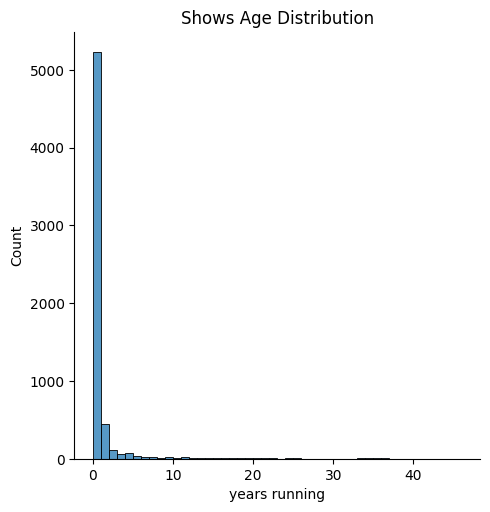

In [ ]:
sns.displot(data=shows, x='years running', binwidth=1)
plt.title('Shows Age Distribution')

Text(0.5, 1.0, 'Shows Age Distribution (≥ 1 year)')

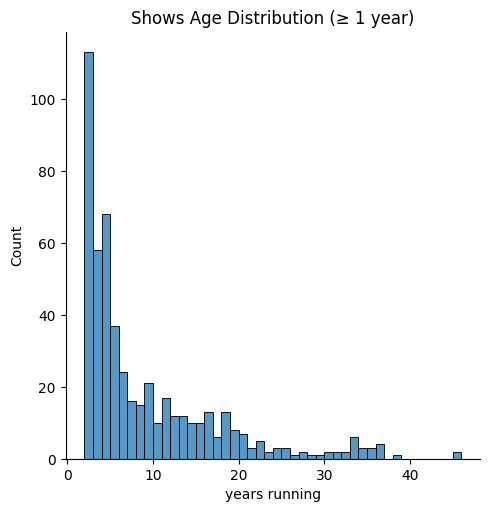

In [ ]:
sns.displot(data=shows[shows['years running'] > 1], x='years running', binwidth=1)
plt.title('Shows Age Distribution (≥ 1 year)')

In [ ]:
#Q4 Is there correlation between show age and number of episodes?

In [ ]:
shows['episodes'] = pd.to_numeric(shows['episodes'], errors='coerce').astype('int64')
corr_coef = shows['days running'].corr(shows['episodes'])

<ipython-input-13-5a4a5c386c8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['episodes'] = pd.to_numeric(shows['episodes'], errors='coerce').astype('int64')


Text(0.83, 0.95, 'Correlation coefficient: 0.15')

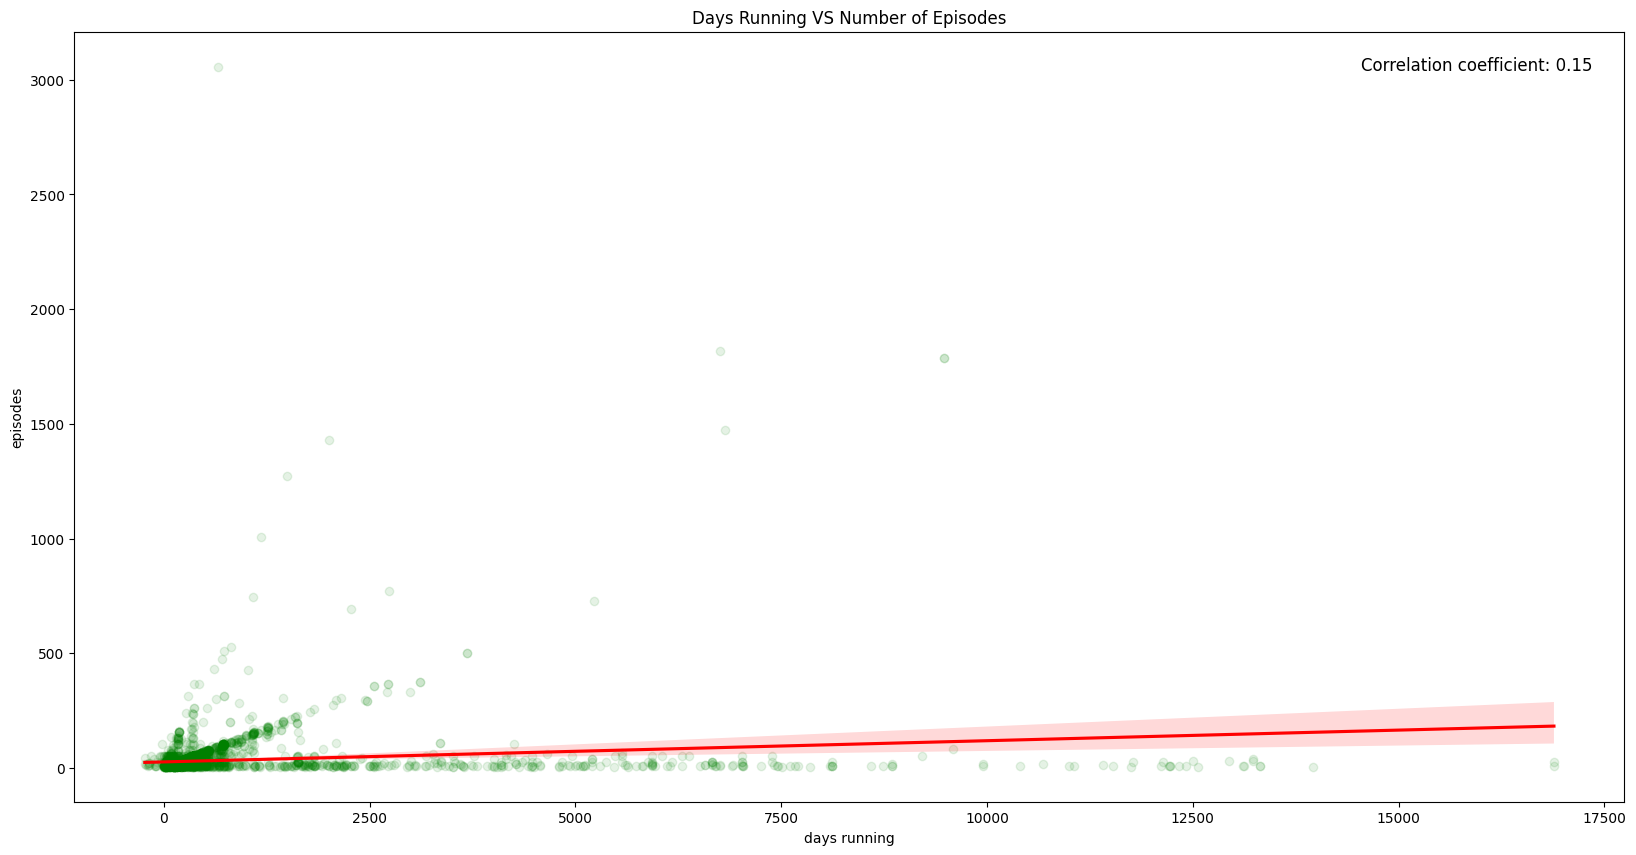

In [ ]:
plt.figure(figsize=(20, 10))

sns.regplot(data=shows,
            x= "days running",
            y = 'episodes',
            ci=95,
            marker="o",
            scatter_kws = {"color": "green", "alpha": 0.1},
            line_kws=dict(color="r")
)

plt.title('Days Running VS Number of Episodes')

plt.text(x=0.83, y=0.95, s=f'Correlation coefficient: {corr_coef:.2f}',
         fontsize=12, transform=plt.gca().transAxes)

In [ ]:
shows[shows["days running"] > 10000] # Hannah added

,Unnamed: 0,uid,title,synopsis,genre,aired,episodes,popularity,ranked,score,episode,date from,date to,days running,years running
1210,1210,7216,Sekai Douwa Anime Zenshuu,Each episode tells a different story from Grim...,"['Adventure', 'Kids', 'Fantasy']","Oct 6, 1990",10,11949,8049.0,6.09,0,1990-10-06,NaT,12225,33
1375,1375,17088,Agigongryong Doolie,The story of a baby dinosaur in modern day Sou...,"['Adventure', 'Kids']","Oct 7, 1987",6,11848,7967.0,6.10,0,1987-10-07,NaT,13320,36
3647,3647,6907,Mikan-Seijin,Mikan Seijin is about an tangerine-like alien ...,['Comedy'],1992,26,11486,9574.0,5.61,24,1992-01-01,NaT,11773,32
4019,4019,11695,Ultraman Graffiti,Super deformed Ultraman shorts,"['Action', 'Comedy', 'Parody', 'Super Power']","Oct 25, 1990",6,11892,9205.0,5.74,0,1990-10-25,NaT,12206,33
4846,4846,17086,Agigongryong Doolie (1988),Continuation of the series from 1987.,['Kids'],"May 5, 1988",7,12379,8456.0,5.96,0,1988-05-05,NaT,13109,35
5016,5016,2305,Mobile Suit SD Gundam Mk III,The SD Gundams in Warring States Era Japan. \n...,"['Mecha', 'Parody', 'Sci-Fi']","Mar 23, 1990",6,7473,8324.0,6.01,0,1990-03-23,NaT,12422,34
7065,7065,5043,Hurricane Live! 2032,Elements of the Bubblegum Crisis series in an ...,['Music'],"Apr 24, 1988",6,8539,4646.0,6.79,0,1988-04-24,NaT,13120,35
9463,9463,33108,Anime Douyou,A series of animated videos for various childr...,"['Music', 'Kids']",1988,30,14355,11535.0,6.08,24,1988-01-01,NaT,13234,36
9906,9906,5036,Hurricane Live! 2033,Hurricane Live 2033: More Music of the Bubbleg...,['Music'],"Jun 27, 1990",7,8703,5237.0,6.67,0,1990-06-27,NaT,12326,33
10055,10055,26199,Doolie Baenang-Yeohaeng,"Dooly and gang travel around the world, speaki...","['Adventure', 'Kids']","Oct, 1995",7,14735,11922.0,5.52,0,1995-10-01,NaT,10404,28
